# Home Cage Interaction Analysis

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
# Get the root directory (adjust according to your folder structure)
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Go up one directory to P2_Code
# Add the root directory to sys.path
sys.path.append(root_dir)

from group_tdt_class import *   
from experiment_functions import *

In [2]:
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc_csvs"
# brain_region = '#FFAF00'

experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac_csvs"
brain_region = '#15616F'

In [3]:
group_data = GroupTDTData(experiment_path, csv_base_path)
group_data.batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n1-240508-080051\Notes.txt
read from t=0s to t=1783.78s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n2-240508-092906\Notes.txt
read from t=0s to t=1810.33s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n3-240509-062454\Notes.txt
read from t=0s to t=1803.43s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n4-240509-075317\Notes.txt
read from t=0s to t=1802.32s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n5-240823-085032\Notes.txt
read from t=0s to t=1789.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n6-240823-101436\Notes.txt
read from t=0s to t=1793.07s
Found Synapse note file: C:\

In [4]:
group_data.hc_processing()

Home Cage Processing n1-240508-080051...
Home Cage Processing n2-240508-092906...
Home Cage Processing n3-240509-062454...
Home Cage Processing n4-240509-075317...
Home Cage Processing n5-240823-085032...
Home Cage Processing n6-240823-101436...
Home Cage Processing n7-240824-062103...


In [5]:
# Define the custom color palette
custom_palette = ['#FF9F1C', '#0077B6', '#D1E8E2', '#55A630', '#E07A5F', '#FFADAD', '#2C2C54', '#792910']

In [6]:
# group_data.plot_first_investigation_vs_dff(behavior_name='Investigation')

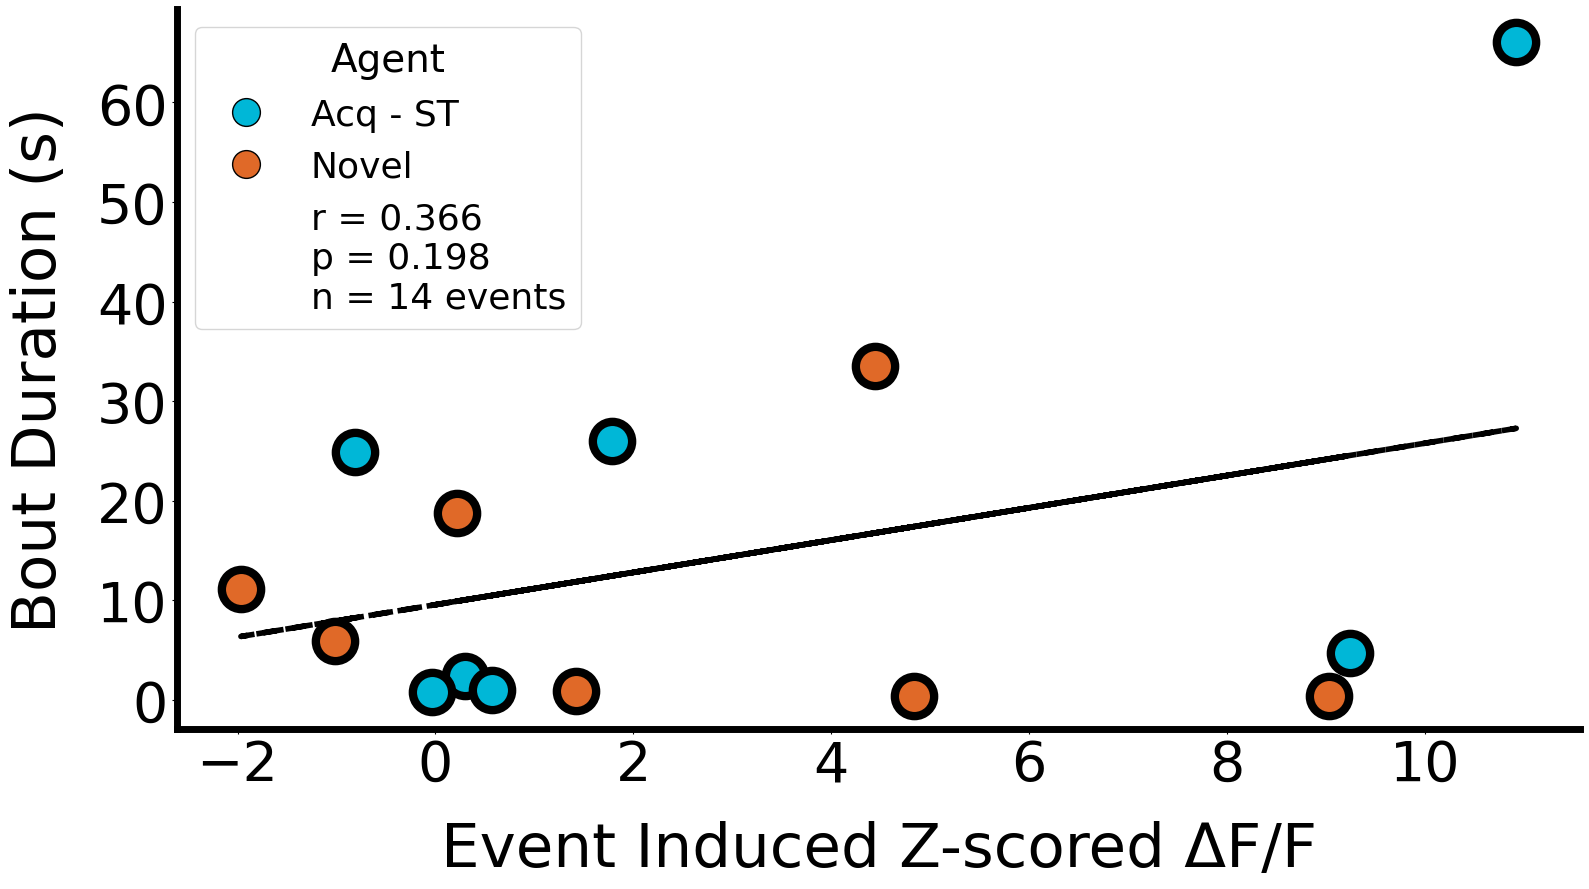

In [7]:
legend_names = ['Novel','Acq - ST']
group_data.plot_first_investigation_vs_dff_4s(behavior_name='Investigation')

Truncated PETH for block 'n3-240509-062454', bout 'Long_Term_1' to 8138 bins.
Truncated PETH for block 'n4-240509-075317', bout 'Long_Term_1' to 8138 bins.


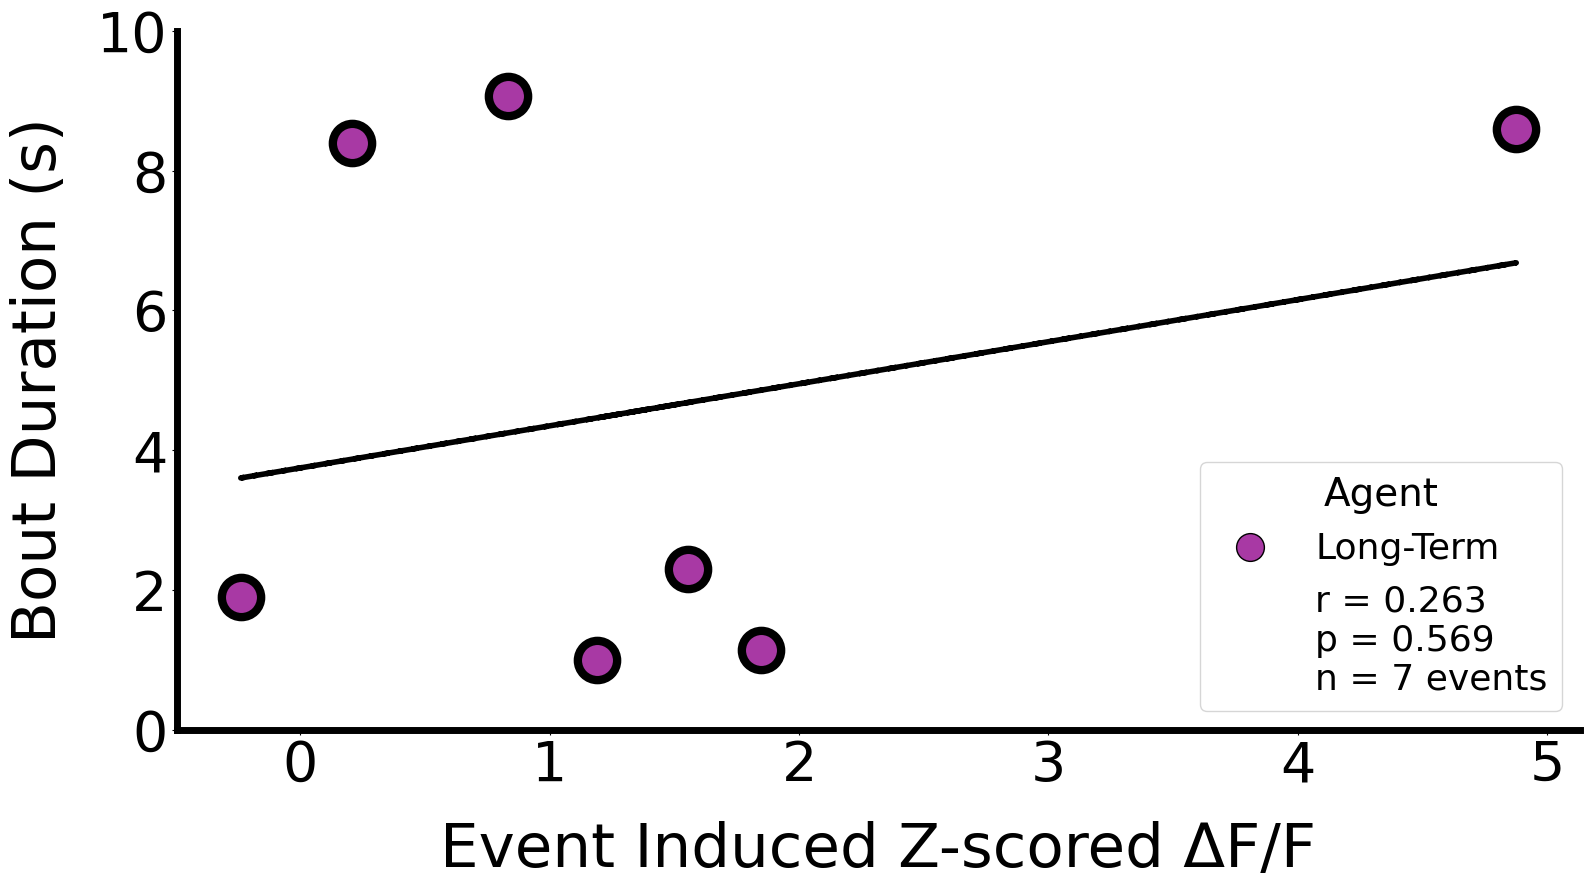

In [8]:
legend_names = ['Novel','Acq - ST']

columns = ['Short_Term_1', 'Short_Term_2', 'Long_Term_1', 'Novel_1' ]
group_data.plot_first_investigation_vs_dff_4s(behavior_name='Investigation', bouts = ['Long_Term_1'],ylim=(0,10), legend_loc = 'lower right')

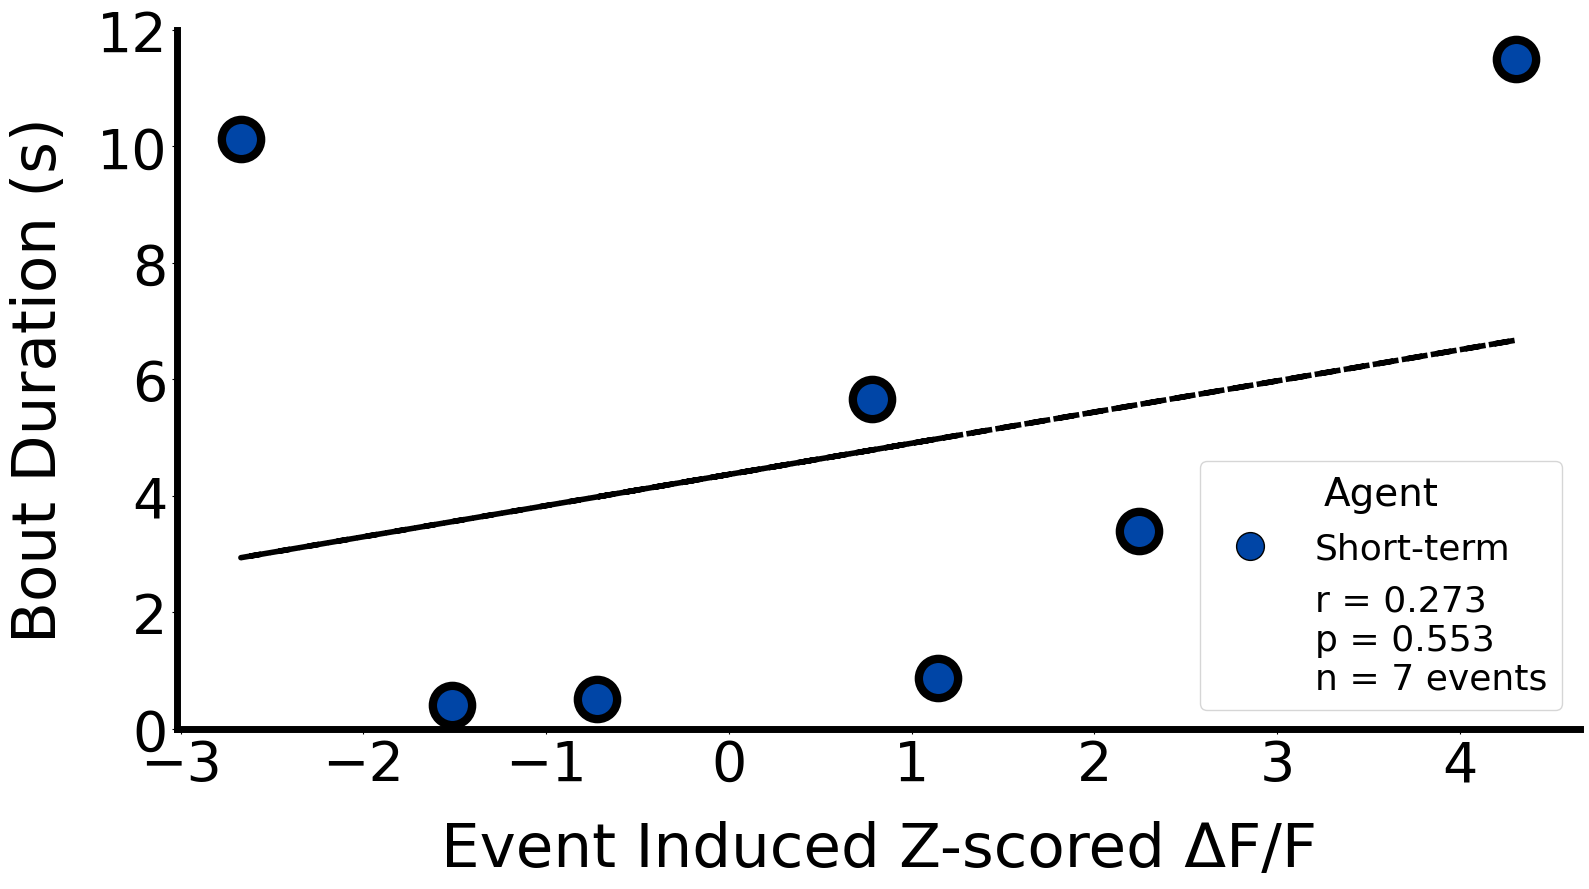

In [9]:
group_data.plot_first_investigation_vs_dff_4s(behavior_name='Investigation', bouts = ['Short_Term_2'],ylim=(0,12),legend_loc='lower right')

## Total Investigation Time Per bout

Skipping event outside the 5-minute window: 496.467
Skipping event outside the 5-minute window: 508.4
Skipping event outside the 5-minute window: 511.867
Skipping event outside the 5-minute window: 519.067
Skipping event outside the 5-minute window: 584.333
Skipping event outside the 5-minute window: 593.667
Skipping event outside the 5-minute window: 598.867
Skipping event outside the 5-minute window: 632.667
Skipping event outside the 5-minute window: 677.267
Skipping event outside the 5-minute window: 756.867
Skipping event outside the 5-minute window: 766.6
Skipping event outside the 5-minute window: 770.6
Skipping event outside the 5-minute window: 497.533
Skipping event outside the 5-minute window: 505.733
Skipping event outside the 5-minute window: 510.933
Skipping event outside the 5-minute window: 525.867
Skipping event outside the 5-minute window: 538.333
Skipping event outside the 5-minute window: 548.733
Skipping event outside the 5-minute window: 600.133
Skipping event out

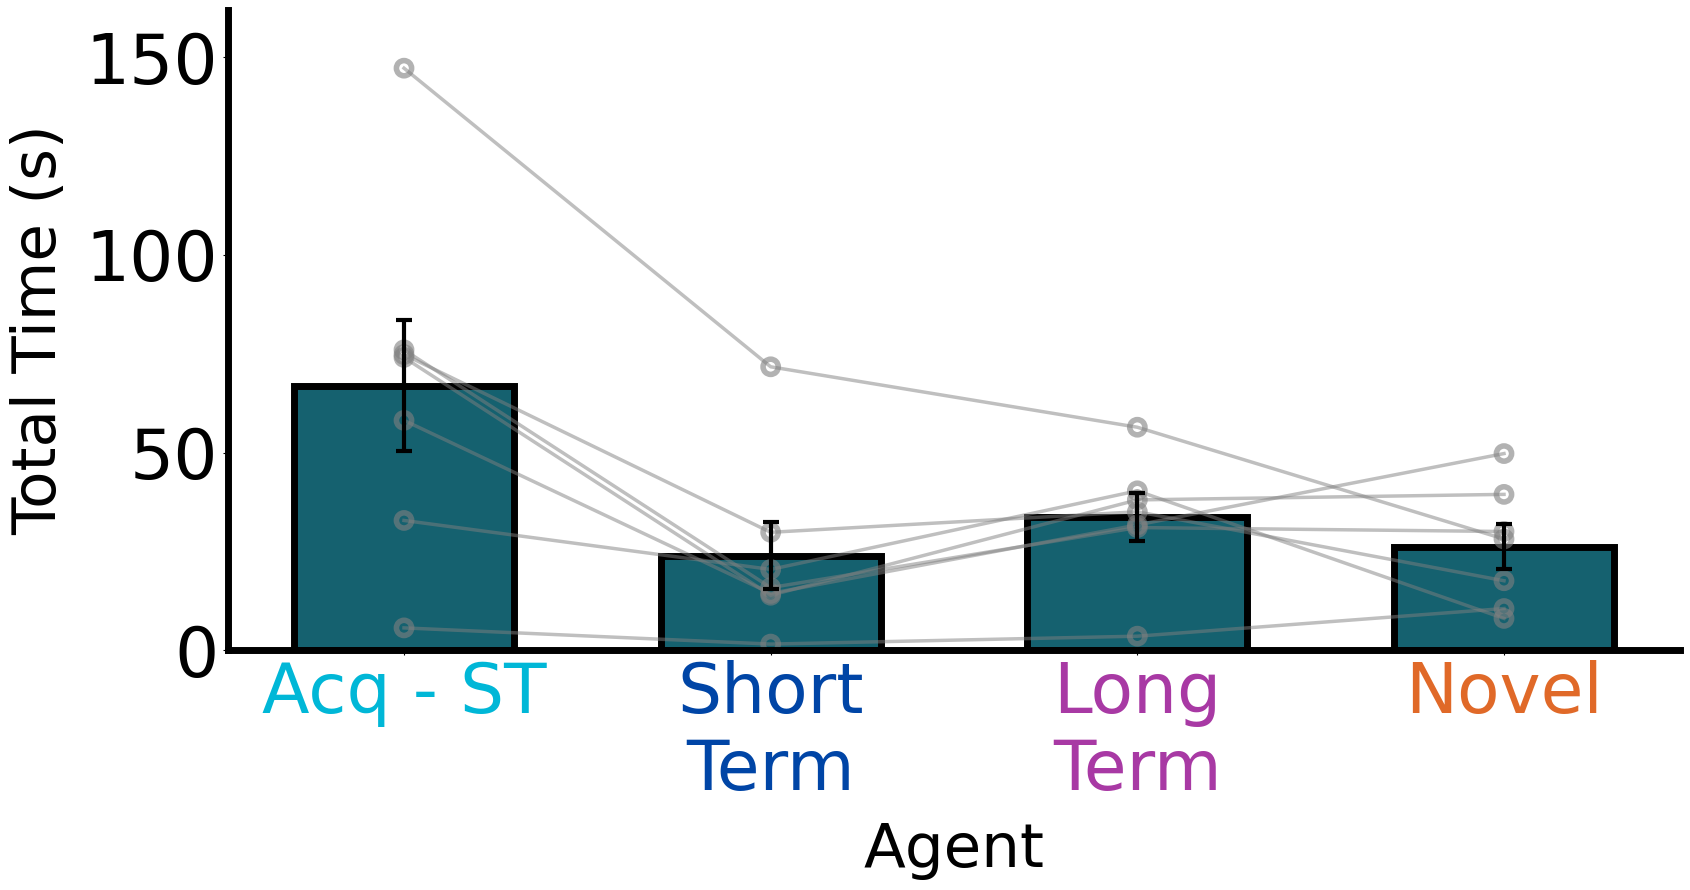

In [10]:
# Define the columns representing the bouts
columns = ['Short_Term_1', 'Short_Term_2', 'Long_Term_1', 'Novel_1' ]


# Extract average investigation durations
tot_inv_duration_df = extract_total_behavior_durations_first_five_minutes(group_data=group_data, behavior='Investigation')

# Custom x-tick labels
custom_labels = ['Acq - ST', 'Short\nTerm', 'Long\nTerm', 'Novel']
colors = ['#00B7D7','#0045A6','#A839A4','#E06928']

# Plot the data with custom x-tick labels
# plot_y_across_bouts(avg_inv_duration_df, 'Average Investigation Time Across Bouts', 'Investigation Time (s)', colors=custom_palette, custom_xtick_labels=custom_labels)

plot_y_across_bouts_gray(tot_inv_duration_df, '','Total Time (s)', custom_xtick_labels=custom_labels,
                         bar_color=brain_region,figsize=(17,9), custom_xtick_colors=colors)


In [11]:
import pandas as pd
from scipy.stats import ttest_rel
from itertools import combinations
from statsmodels.stats.multitest import multipletests

# Assuming avg_inv_tot_duration_df is your DataFrame
# Example structure:
# avg_inv_tot_duration_df = pd.DataFrame({
#     'Acq - ST': [value1, value2, ...],
#     'Short\nTerm': [value1, value2, ...],
#     'Long\nTerm': [value1, value2, ...],
#     'Novel': [value1, value2, ...]
# })

# Define the list of columns to compare
columns = tot_inv_duration_df.columns.tolist()

# Generate all unique pairs of columns for paired t-tests
pairs = list(combinations(columns, 2))

# Prepare a list to store the results
results = []

for pair in pairs:
    col1, col2 = pair
    # Drop any rows with NaN in either of the two columns to maintain pairing
    paired_data = tot_inv_duration_df[[col1, col2]].dropna()
    
    # Perform the paired t-test
    t_stat, p_val = ttest_rel(paired_data[col1], paired_data[col2])
    
    # Append the results to the list
    results.append({
        'Group 1': col1,
        'Group 2': col2,
        't-statistic': t_stat,
        'p-value': p_val
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df

,Group 1,Group 2,t-statistic,p-value
0,Short_Term_1,Short_Term_2,4.351901,0.004813
1,Short_Term_1,Novel_1,2.740021,0.033735
2,Short_Term_1,Long_Term_1,2.659077,0.037570
3,Short_Term_2,Novel_1,-1.906848,0.105166
4,Short_Term_2,Long_Term_1,-0.222666,0.831182
5,Novel_1,Long_Term_1,1.054555,0.332231


In [12]:
# # Define the columns representing the bouts
# columns = ['Short_Term_1', 'Short_Term_2', 'Long_Term_1', 'Novel_1' ]

# # Extract average investigation durations
# tot_inv_duration_df = extract_total_behavior_durations(group_data=group_data, bouts=columns, behavior='Investigation')

# # Custom x-tick labels
# custom_labels = ['Acq - ST', 'Short Term', 'Long Term', 'Novel']

# plot_y_across_bouts_gray(tot_inv_duration_df, '','Investigation Time (s)', custom_xtick_labels=custom_labels,bar_color=brain_region,figsize=(17,9))


## Average Total Investigation Duration per bout

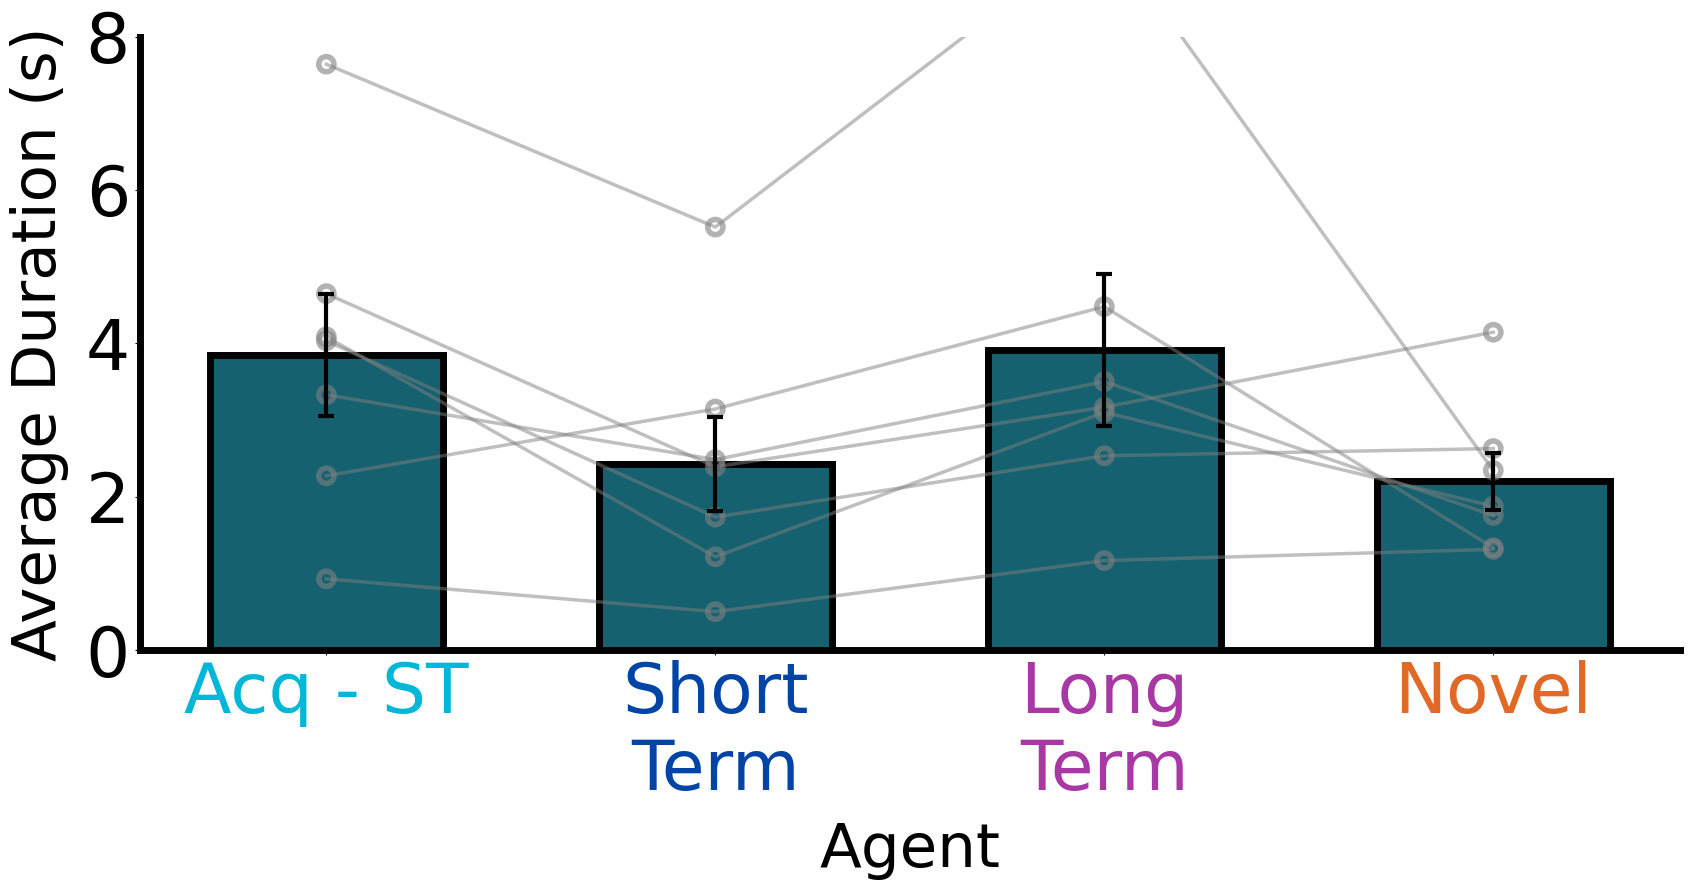

In [13]:
avg_inv_tot_duration_df = extract_average_behavior_durations(group_data=group_data, bouts=columns, behavior = 'Investigation')
custom_labels = ['Acq - ST', 'Short\nTerm', 'Long\nTerm', 'Novel']
colors = ['#00B7D7','#0045A6','#A839A4','#E06928']
# plot_y_across_bouts(avg_inv_tot_duration_df, 'Average Total Investigation Time Across Bouts','Investigation Time (s)', colors=custom_palette, custom_xtick_labels=custom_labels)
plot_y_across_bouts_gray(avg_inv_tot_duration_df, '','Average Duration (s)', custom_xtick_labels=custom_labels,bar_color=brain_region,figsize=(17,9), 
                         pad_inches =0, ylim=(0,8), custom_xtick_colors=colors)

In [14]:
import pandas as pd
from scipy.stats import ttest_rel
from itertools import combinations
from statsmodels.stats.multitest import multipletests

# Assuming avg_inv_tot_duration_df is your DataFrame
# Example structure:
# avg_inv_tot_duration_df = pd.DataFrame({
#     'Acq - ST': [value1, value2, ...],
#     'Short\nTerm': [value1, value2, ...],
#     'Long\nTerm': [value1, value2, ...],
#     'Novel': [value1, value2, ...]
# })

# Define the list of columns to compare
columns = avg_inv_tot_duration_df.columns.tolist()

# Generate all unique pairs of columns for paired t-tests
pairs = list(combinations(columns, 2))

# Prepare a list to store the results
results = []

for pair in pairs:
    col1, col2 = pair
    # Drop any rows with NaN in either of the two columns to maintain pairing
    paired_data = avg_inv_tot_duration_df[[col1, col2]].dropna()
    
    # Perform the paired t-test
    t_stat, p_val = ttest_rel(paired_data[col1], paired_data[col2])
    
    # Append the results to the list
    results.append({
        'Group 1': col1,
        'Group 2': col2,
        't-statistic': t_stat,
        'p-value': p_val
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df

,Group 1,Group 2,t-statistic,p-value
0,Short_Term_1,Short_Term_2,2.826102,0.030112
1,Short_Term_1,Novel_1,-0.104710,0.920019
2,Short_Term_1,Long_Term_1,2.411310,0.052480
3,Short_Term_2,Novel_1,-3.436318,0.013863
4,Short_Term_2,Long_Term_1,0.342690,0.743519
5,Novel_1,Long_Term_1,1.653606,0.149292


## Mean DA During 1st and 5th Investigation

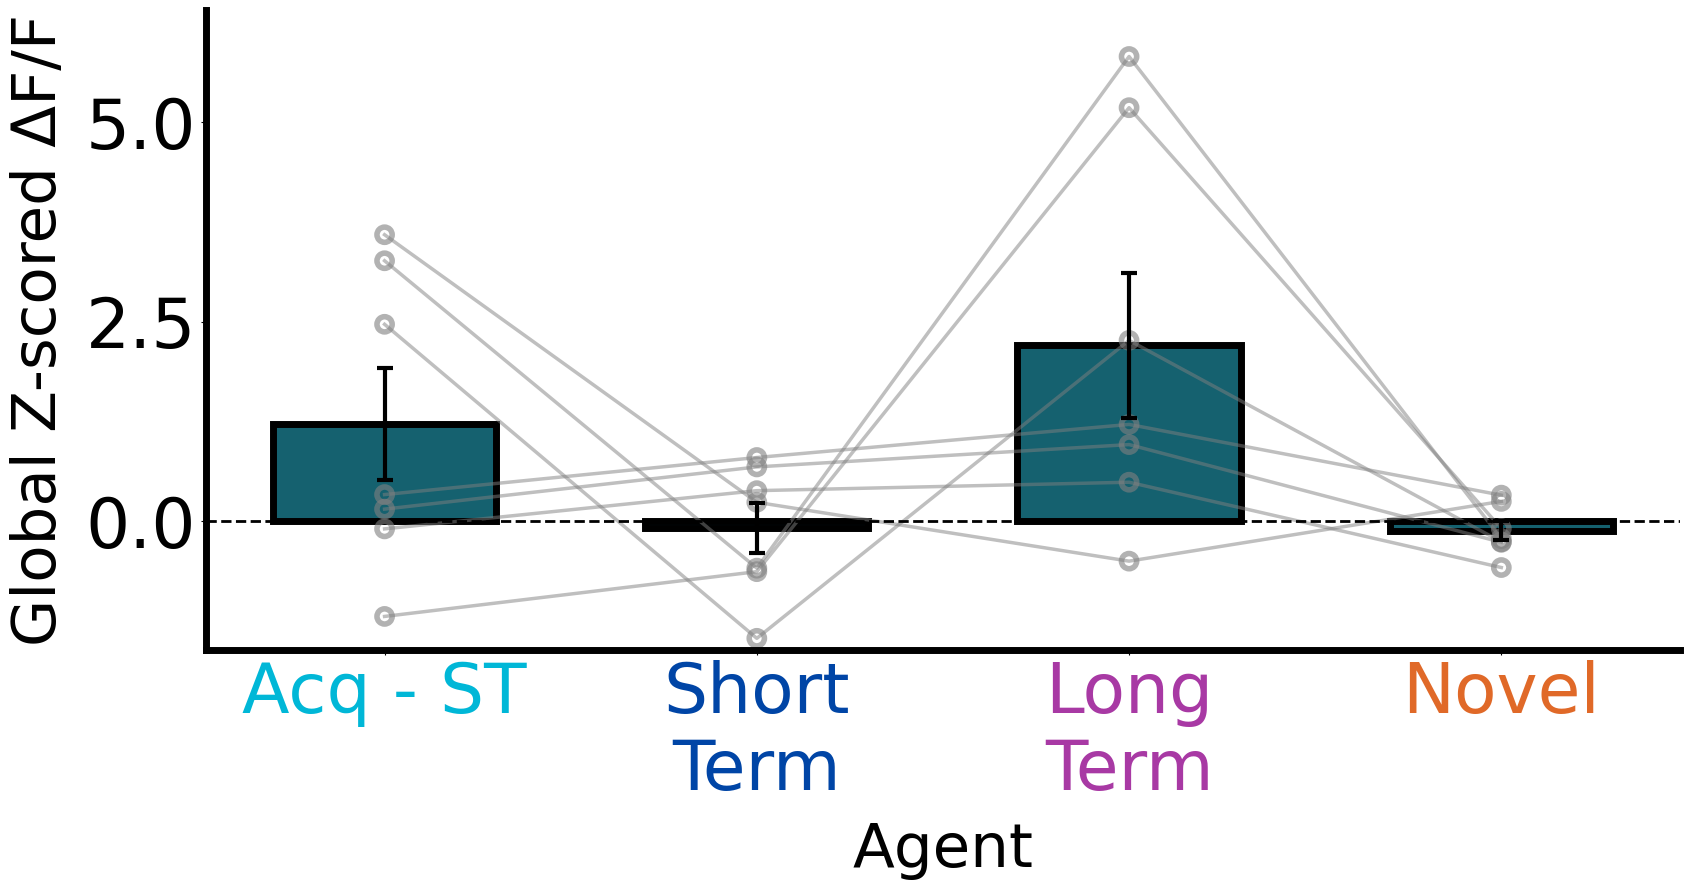

In [15]:
inv_1st_mean_df = extract_nth_behavior_mean_da(group_data=group_data, bouts=columns, behavior='Investigation', n = 1)
column_order = ['Short_Term_1', 'Short_Term_2', 'Long_Term_1', 'Novel_1']
inv_1st_mean_df = inv_1st_mean_df[column_order]
colors = ['#00B7D7','#0045A6','#A839A4','#E06928']
# plot_y_across_bouts(inv_1st_mean_df, 'Mean DA during 1st Investigation Across Bouts','Mean DA (zscored dff)')
plot_y_across_bouts_gray(inv_1st_mean_df, '','Global Z-scored ΔF/F', custom_xtick_labels=custom_labels,bar_color=brain_region, figsize=(17,9),custom_xtick_colors=colors)

In [16]:
inv_1st_mean_df


,Short_Term_1,Short_Term_2,Long_Term_1,Novel_1
Subject,,,,
n1,2.468450,-1.463249,2.267108,-0.254595
n2,-1.189168,-0.628520,5.180464,-0.088432
n3,0.154450,0.682858,0.962508,-0.261122
n4,-0.092928,0.385468,0.491204,-0.576845
n5,0.336520,0.800621,1.214821,0.329341
n6,3.589952,0.239979,-0.496898,0.251306
n7,3.264079,-0.584715,5.821413,-0.214645


In [17]:
import pandas as pd
from scipy.stats import ttest_rel
from itertools import combinations
from statsmodels.stats.multitest import multipletests

# Assuming avg_inv_tot_duration_df is your DataFrame
# Example structure:
# avg_inv_tot_duration_df = pd.DataFrame({
#     'Acq - ST': [value1, value2, ...],
#     'Short\nTerm': [value1, value2, ...],
#     'Long\nTerm': [value1, value2, ...],
#     'Novel': [value1, value2, ...]
# })

# Define the list of columns to compare
columns = inv_1st_mean_df.columns.tolist()

# Generate all unique pairs of columns for paired t-tests
pairs = list(combinations(columns, 2))

# Prepare a list to store the results
results = []

for pair in pairs:
    col1, col2 = pair
    # Drop any rows with NaN in either of the two columns to maintain pairing
    paired_data = inv_1st_mean_df[[col1, col2]].dropna()
    
    # Perform the paired t-test
    t_stat, p_val = ttest_rel(paired_data[col1], paired_data[col2])
    
    # Append the results to the list
    results.append({
        'Group 1': col1,
        'Group 2': col2,
        't-statistic': t_stat,
        'p-value': p_val
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df

,Group 1,Group 2,t-statistic,p-value
0,Short_Term_1,Short_Term_2,1.520252,0.179260
1,Short_Term_1,Long_Term_1,-0.834193,0.436119
2,Short_Term_1,Novel_1,1.944506,0.099816
3,Short_Term_2,Long_Term_1,-2.037828,0.087708
4,Short_Term_2,Novel_1,0.115700,0.911665
5,Long_Term_1,Novel_1,2.481324,0.047720


In [18]:
# inv_1st_mean_df = extract_nth_behavior_mean_da_corrected(group_data=group_data, bouts=columns, behavior='Investigation', n=1, max_duration=4.0)

# plot_y_across_bouts_gray(inv_1st_mean_df, '','Mean DA (zscored dff)', custom_xtick_labels=custom_labels, ylim = (-2,6),bar_color=brain_region)


In [19]:
import pandas as pd
from scipy.stats import ttest_rel
from itertools import combinations
from statsmodels.stats.multitest import multipletests

# Assuming avg_inv_tot_duration_df is your DataFrame
# Example structure:
# avg_inv_tot_duration_df = pd.DataFrame({
#     'Acq - ST': [value1, value2, ...],
#     'Short\nTerm': [value1, value2, ...],
#     'Long\nTerm': [value1, value2, ...],
#     'Novel': [value1, value2, ...]
# })

# Define the list of columns to compare
columns = inv_1st_mean_df.columns.tolist()

# Generate all unique pairs of columns for paired t-tests
pairs = list(combinations(columns, 2))

# Prepare a list to store the results
results = []

for pair in pairs:
    col1, col2 = pair
    # Drop any rows with NaN in either of the two columns to maintain pairing
    paired_data = inv_1st_mean_df[[col1, col2]].dropna()
    
    # Perform the paired t-test
    t_stat, p_val = ttest_rel(paired_data[col1], paired_data[col2])
    
    # Append the results to the list
    results.append({
        'Group 1': col1,
        'Group 2': col2,
        't-statistic': t_stat,
        'p-value': p_val
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df

,Group 1,Group 2,t-statistic,p-value
0,Short_Term_1,Short_Term_2,1.520252,0.179260
1,Short_Term_1,Long_Term_1,-0.834193,0.436119
2,Short_Term_1,Novel_1,1.944506,0.099816
3,Short_Term_2,Long_Term_1,-2.037828,0.087708
4,Short_Term_2,Novel_1,0.115700,0.911665
5,Long_Term_1,Novel_1,2.481324,0.047720


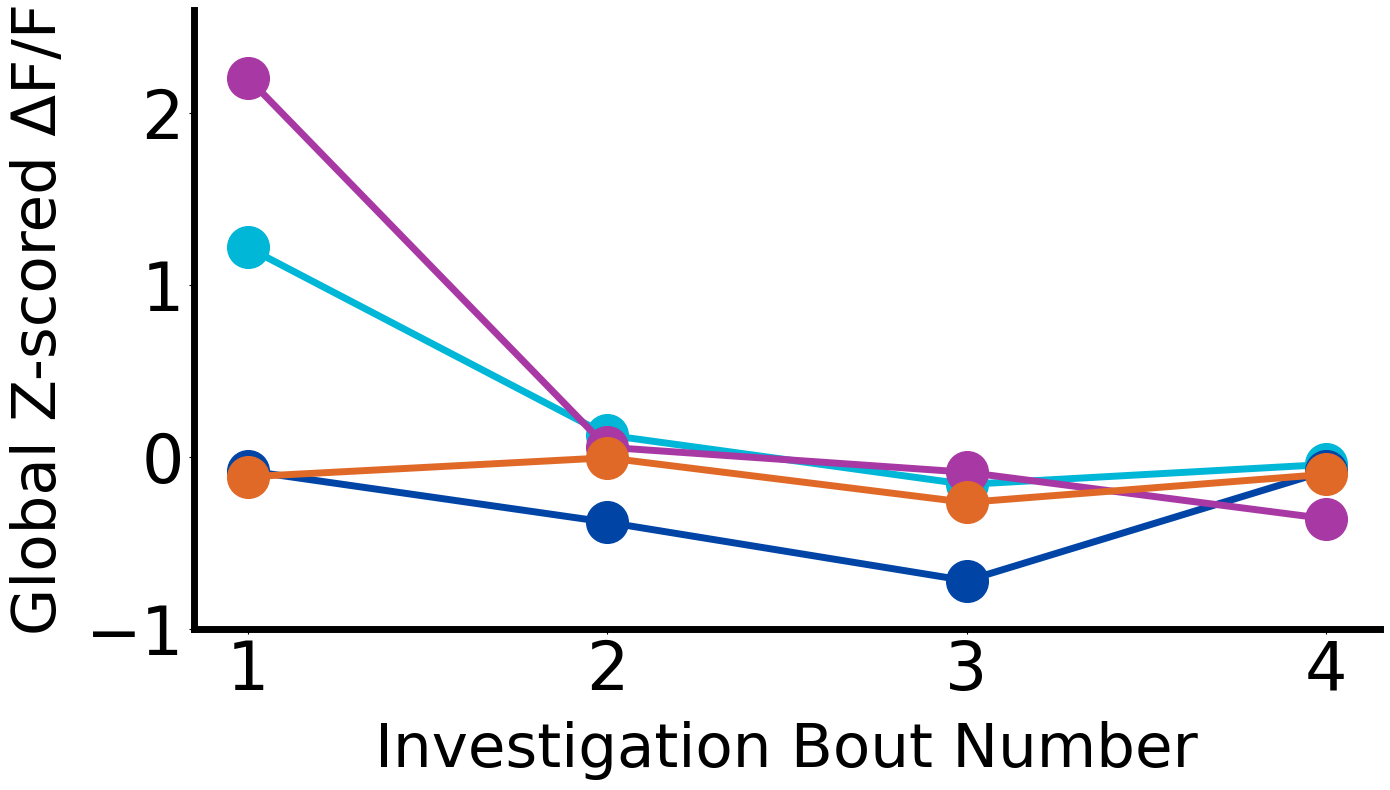

Slope for Short_Term_1: -0.41
Slope for Short_Term_2: -0.03
Slope for Long_Term_1: -0.78
Slope for Novel_1: -0.02


In [20]:
# NAC
# custom_palette = ['#5d4eff', '#00f9ff', '#44ff32', '#565656']

#mPFC
# custom_palette = ['#ec0000', '#ec5300', '#ecca00', '#565656']

custom_labels = ['Acq - ST', 'Short Term', 'Long Term', 'Novel']

mean_da_df = extract_nth_to_mth_behavior_mean_da(group_data, columns , behavior='Investigation', n_start=1, n_end=4)
plot_meanDA_across_investigations(mean_da_df,columns, max_investigations=4, metric_type='slope',colors=colors, custom_xtick_labels=['1','2','3','4']
                                  ,custom_legend_labels=custom_labels, ylim = (-1,2.6))

## PETH'S

Truncated PETH for block 'n3-240509-062454', bout 'Long_Term_1' to 8138 bins.
Truncated PETH for block 'n4-240509-075317', bout 'Long_Term_1' to 8138 bins.


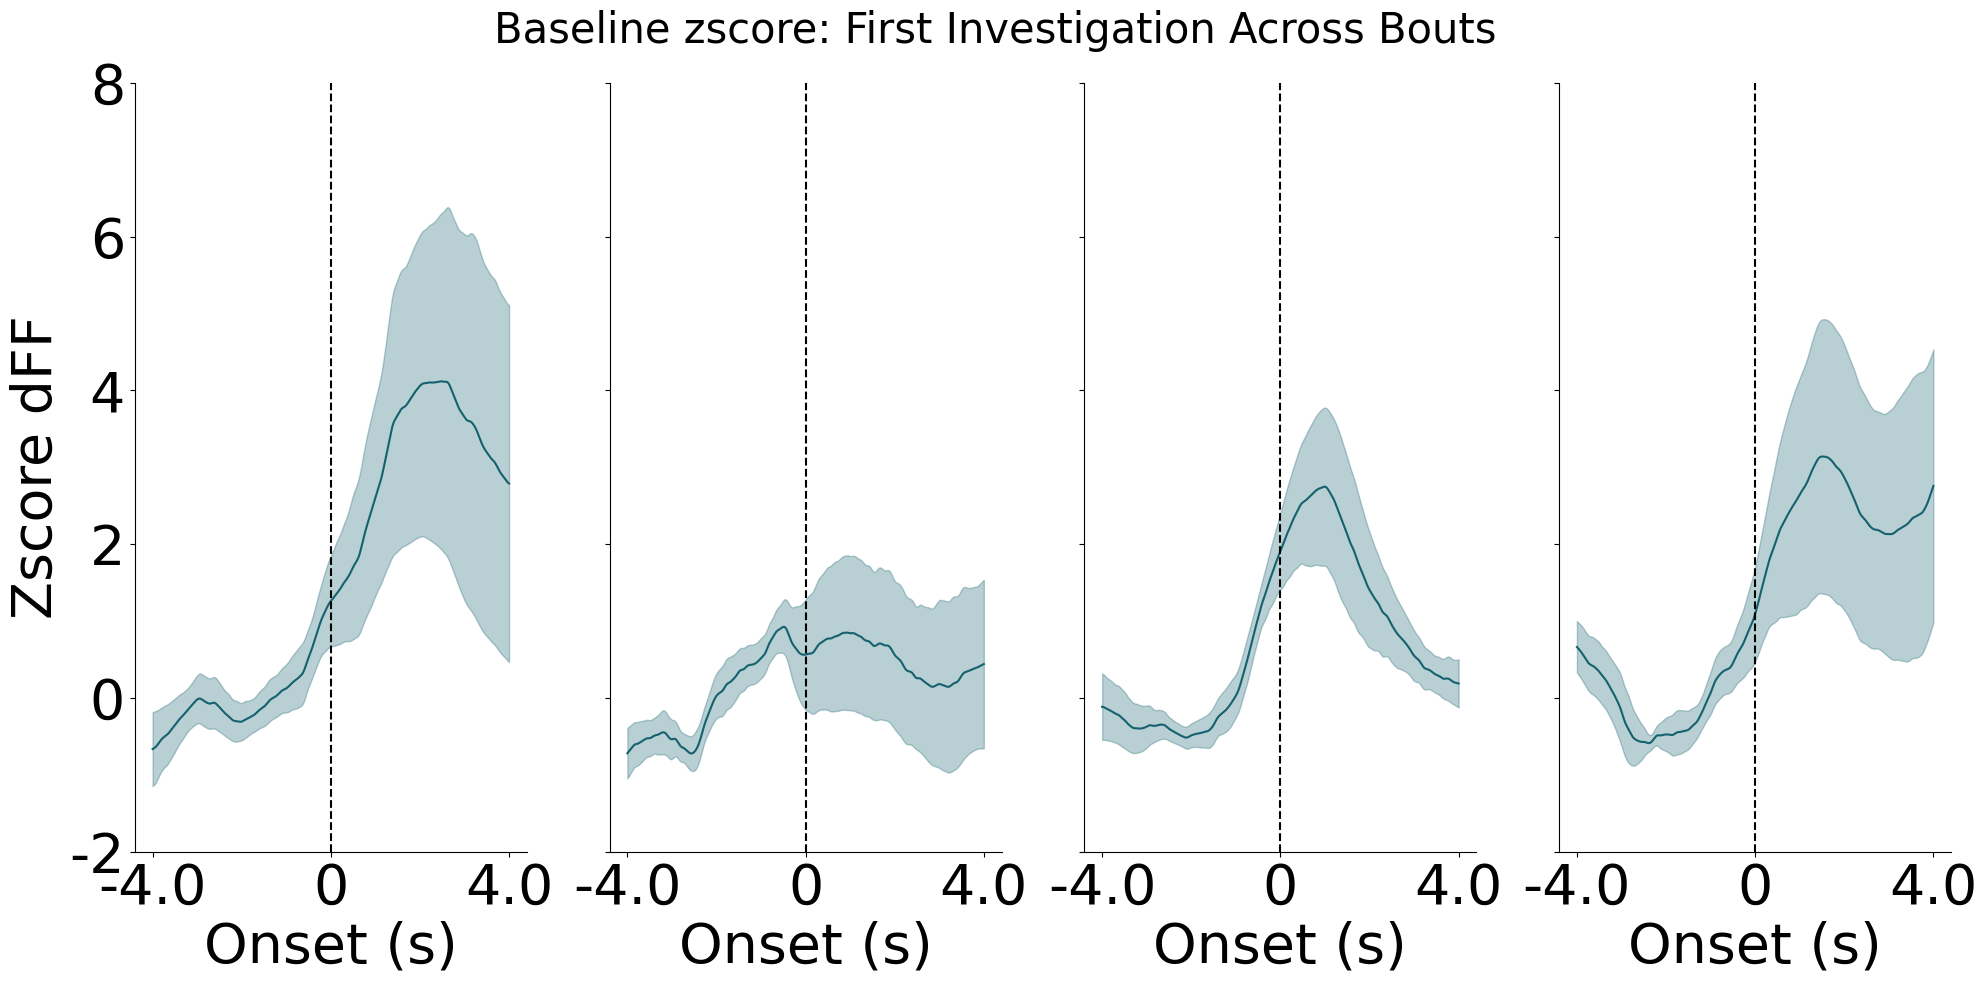

In [21]:
columns = ['Short_Term_1', 'Short_Term_2', 'Long_Term_1', 'Novel_1']

group_data.compute_nth_bout_peth_all_blocks(behavior_name='Investigation', nth_occurrence=1, bouts=columns, pre_time=4, post_time=4)
group_data.plot_peth_for_bouts(signal_type='zscore', error_type='sem', bouts=columns,
                                title='Baseline zscore: First Investigation Across Bouts',color=brain_region
                                ,display_pre_time=4, display_post_time=4)


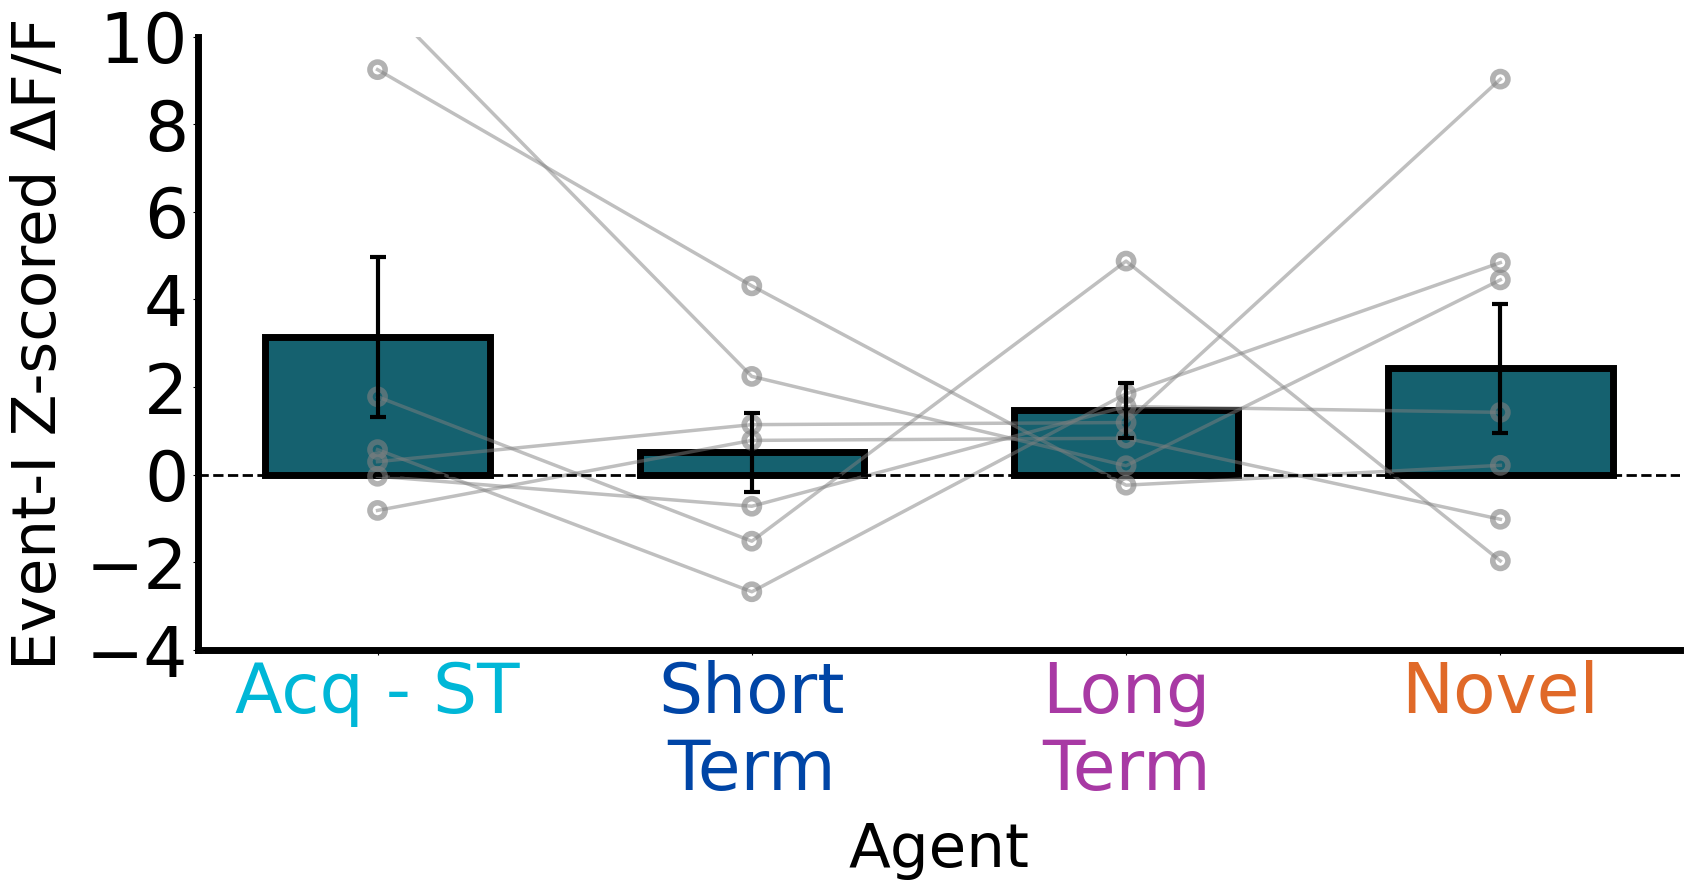

In [22]:
custom_labels = ['Acq - ST', 'Short\nTerm', 'Long\nTerm', 'Novel']
df = extract_nth_behavior_mean_baseline_peth(group_data=group_data, bouts=columns,behavior='Investigation',n=1, windows=[(0,4)], pre_time=4, post_time=4)


# desired_order = ['novel', 'long_term','short_term', 'nothing']
# df  = df[desired_order]
# df   = df.fillna(0)

plot_y_across_bouts_gray(df,title='',ylabel='Event-I Z-scored ΔF/F', custom_xtick_labels = custom_labels,bar_color=brain_region, 
                         ylim= (-4, 10), yticks_increment=2, xlabel = 'Agent',figsize=(17,9), pad_inches=1, custom_xtick_colors=colors)

In [23]:
df

,Short_Term_1_0s_to_4s,Short_Term_2_0s_to_4s,Long_Term_1_0s_to_4s,Novel_1_0s_to_4s
Subject,,,,
n1,0.297427,1.142641,1.191181,9.027569
n2,0.573051,-2.670679,1.847498,4.839622
n3,1.779029,-1.516724,4.874875,-1.965907
n4,-0.814585,0.783471,0.833154,-1.016893
n5,10.920698,2.243525,0.205877,4.445606
n6,9.243848,4.309678,-0.238875,0.214671
n7,-0.035676,-0.719086,1.556195,1.423238


In [24]:
import pandas as pd
from scipy.stats import ttest_rel
from itertools import combinations
from statsmodels.stats.multitest import multipletests

# Assuming avg_inv_tot_duration_df is your DataFrame
# Example structure:
# avg_inv_tot_duration_df = pd.DataFrame({
#     'Acq - ST': [value1, value2, ...],
#     'Short\nTerm': [value1, value2, ...],
#     'Long\nTerm': [value1, value2, ...],
#     'Novel': [value1, value2, ...]
# })

# Define the list of columns to compare
columns = df.columns.tolist()

# Generate all unique pairs of columns for paired t-tests
pairs = list(combinations(columns, 2))

# Prepare a list to store the results
results = []

for pair in pairs:
    col1, col2 = pair
    # Drop any rows with NaN in either of the two columns to maintain pairing
    paired_data = df[[col1, col2]].dropna()
    
    # Perform the paired t-test
    t_stat, p_val = ttest_rel(paired_data[col1], paired_data[col2])
    
    # Append the results to the list
    results.append({
        'Group 1': col1,
        'Group 2': col2,
        't-statistic': t_stat,
        'p-value': p_val
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df

,Group 1,Group 2,t-statistic,p-value
0,Short_Term_1_0s_to_4s,Short_Term_2_0s_to_4s,1.947469,0.099407
1,Short_Term_1_0s_to_4s,Long_Term_1_0s_to_4s,0.760897,0.475549
2,Short_Term_1_0s_to_4s,Novel_1_0s_to_4s,0.304652,0.770922
3,Short_Term_2_0s_to_4s,Long_Term_1_0s_to_4s,-0.672982,0.526016
4,Short_Term_2_0s_to_4s,Novel_1_0s_to_4s,-1.120045,0.305516
5,Long_Term_1_0s_to_4s,Novel_1_0s_to_4s,-0.538985,0.609299


In [ ]:
# group_data.compute_first_bout_peth_all_blocks_standard(behavior_name='Investigation',bouts= columns, pre_time=5, post_time=5)
# group_data.plot_peth_for_bouts(signal_type='zscore', error_type='sem', bouts=columns, title='Standard zscore: First Investigation Across Agents', color=brain_region, custom_xtick_labels=custom_labels)

No Investigation found in Short_Term_1_0s_to_4s for n1-240508-080051.
No Investigation found in Short_Term_2_0s_to_4s for n1-240508-080051.
No Investigation found in Long_Term_1_0s_to_4s for n1-240508-080051.
No Investigation found in Novel_1_0s_to_4s for n1-240508-080051.
No Investigation found in Short_Term_1_0s_to_4s for n2-240508-092906.
No Investigation found in Short_Term_2_0s_to_4s for n2-240508-092906.
No Investigation found in Long_Term_1_0s_to_4s for n2-240508-092906.
No Investigation found in Novel_1_0s_to_4s for n2-240508-092906.
No Investigation found in Short_Term_1_0s_to_4s for n3-240509-062454.
No Investigation found in Short_Term_2_0s_to_4s for n3-240509-062454.
No Investigation found in Long_Term_1_0s_to_4s for n3-240509-062454.
No Investigation found in Novel_1_0s_to_4s for n3-240509-062454.
No Investigation found in Short_Term_1_0s_to_4s for n4-240509-075317.
No Investigation found in Short_Term_2_0s_to_4s for n4-240509-075317.
No Investigation found in Long_Term_1_

TypeError: GroupTDTData.plot_peth_for_bouts() got an unexpected keyword argument 'custom_xtick_labels'

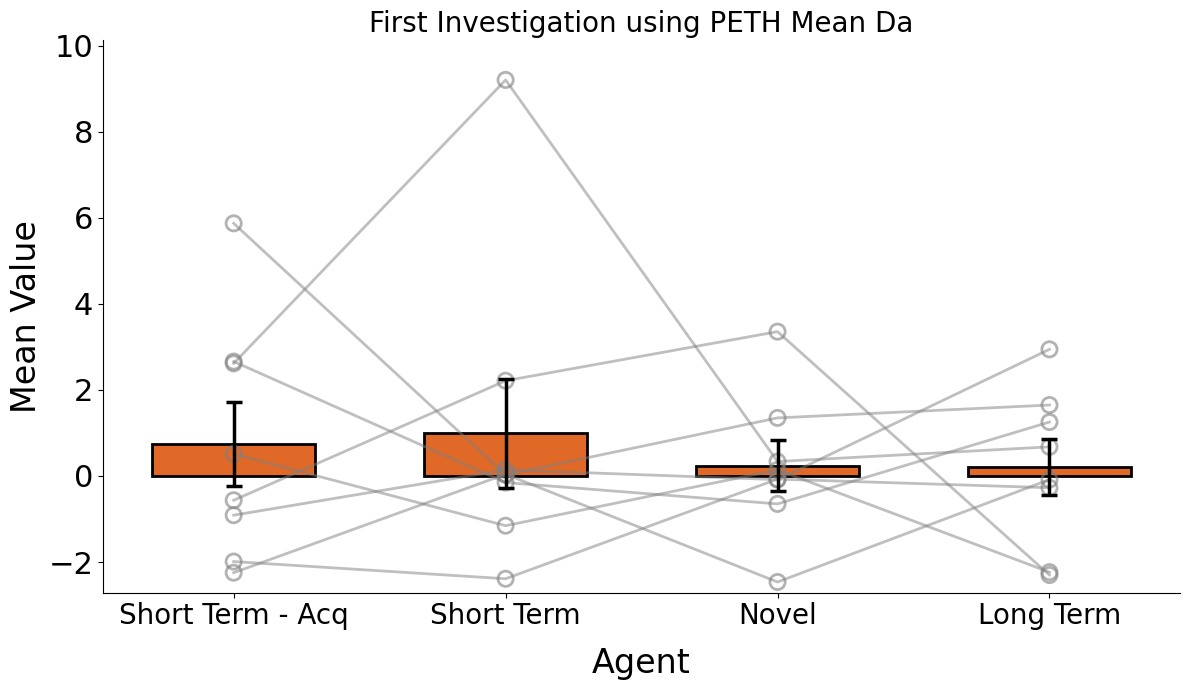

In [ ]:
df = extract_nth_behavior_mean_peth(group_data=group_data, bouts=columns,behavior='Investigation',n=1, windows=[(0, 5)])
plot_y_across_bouts_gray(df,title='First Investigation using PETH Mean Da',ylabel='Mean Value', custom_xtick_labels = custom_labels, bar_color=brain_region)

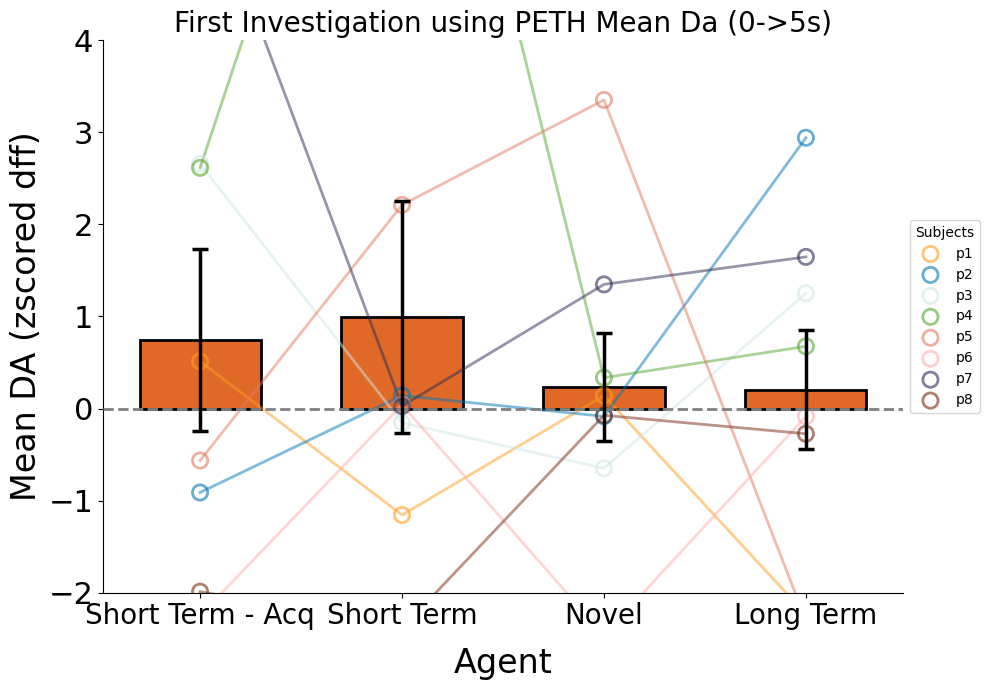

In [ ]:
plot_y_across_bouts(df,title='First Investigation using PETH Mean Da (0->5s)',ylabel='Mean DA (zscored dff)', custom_xtick_labels = custom_labels, ylim = (-2,4),bar_color=brain_region)


No occurrences of Approach found in Novel_1.
No occurrences of Approach found in Long_Term_1.
No occurrences of Approach found in Short_Term_2.
No occurrences of Approach found in Novel_1.
No occurrences of Approach found in Long_Term_1.


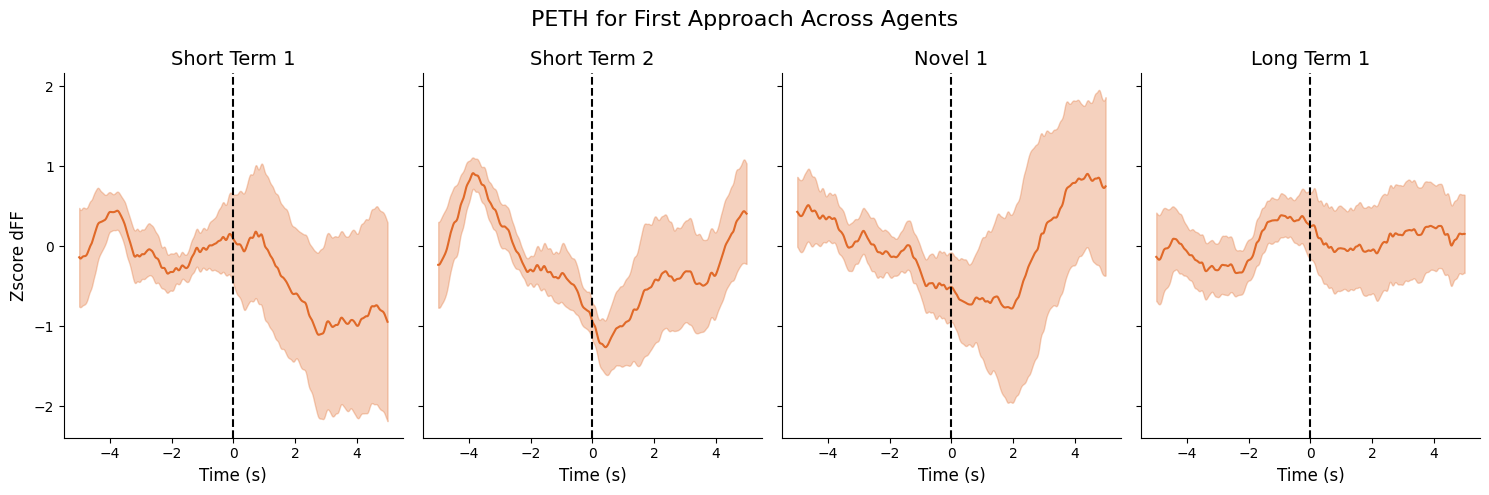

In [ ]:
group_data.compute_first_bout_peth_all_blocks(behavior_name='Approach',bouts= columns, pre_time=5, post_time=5)
group_data.plot_peth_for_bouts(signal_type='zscore', error_type='sem', bouts=columns, title='PETH for First Approach Across Agents', color=brain_region)

## Correlation between Investigations and DA Response

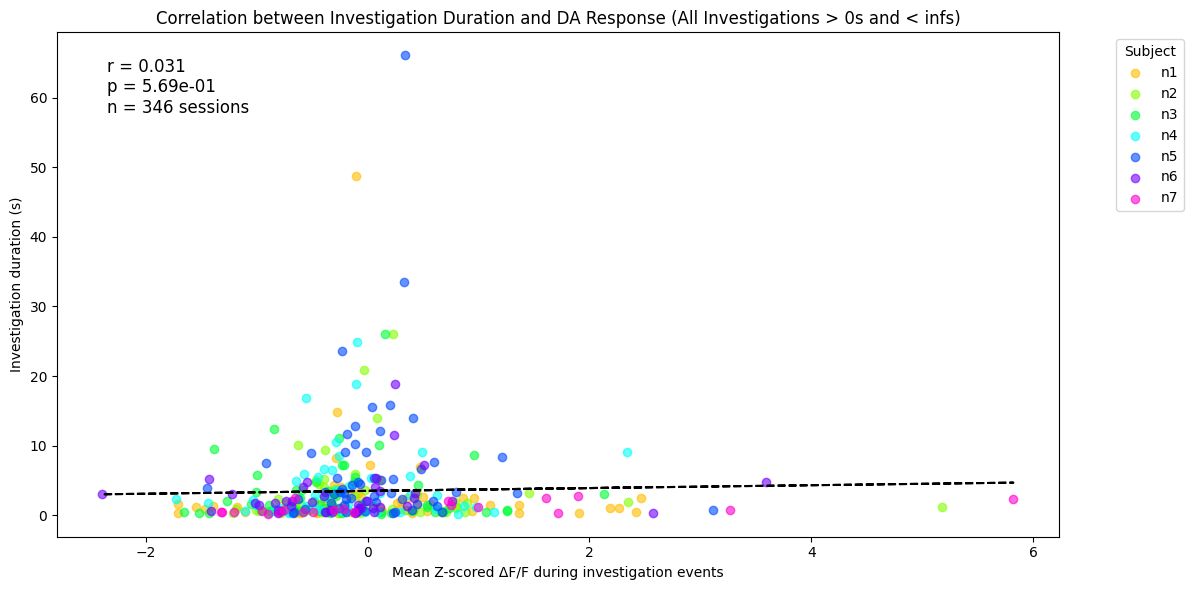

In [26]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=0)

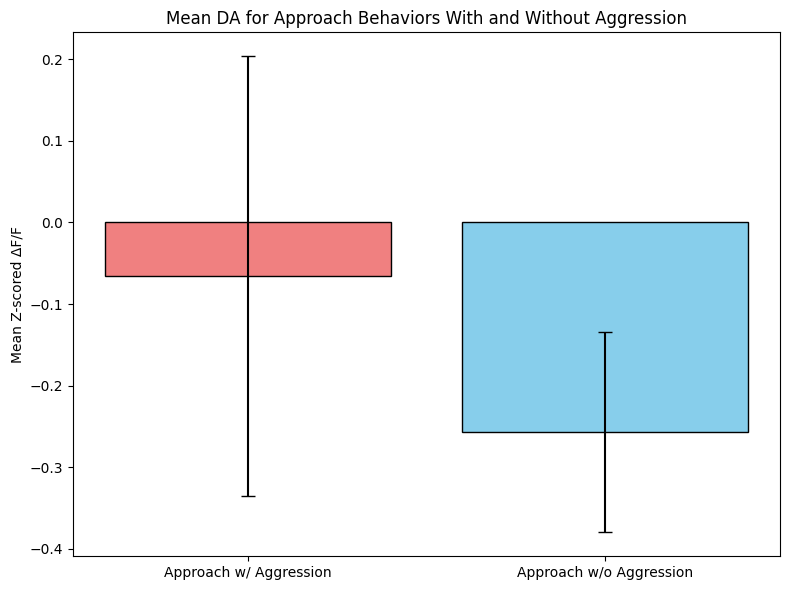

In [ ]:
plot_approach_vs_aggression(group_data=group_data, min_duration=0)

In [ ]:
# group_data.hc_plot_individual_behavior(behavior_name='all',plot_type='zscore',figsize=(20,8))